# CNN vs ANN CIFAR10 Dataset Analysis

## Prepare data

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np
import datetime

In [2]:
# obtain the dataset
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()
(x_train.shape, x_test.shape)

((50000, 32, 32, 3), (10000, 32, 32, 3))

In [3]:
# set up label data
y_train = y_train.reshape(-1,)
classes = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

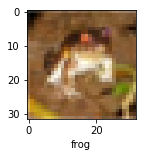

In [4]:
# plot an image from CIFAR-10
def plot_sample(x, y, index):
    plt.figure(figsize= (15,2))
    plt.imshow(x[index])
    plt.xlabel(classes[y[index]])
    
plot_sample(x_train, y_train, 0)

In [7]:
# normalize our data by color channel
def normalize(array):
    return (array - np.mean(array)) / np.std(array)

n_vals = np.array([[0.4914, 0.4822, 0.4465], [0.247, 0.243, 0.261]])

x_train_R = x_train.transpose()[0].transpose()
x_train_G = x_train.transpose()[1].transpose()
x_train_B = x_train.transpose()[2].transpose()

x_test_R = x_test.transpose()[0].transpose()
x_test_G = x_test.transpose()[1].transpose()
x_test_B = x_test.transpose()[2].transpose()

x_train = normalize(x_train)
x_test = normalize(x_test)

## Build, Train, and Test an Artificial Neural Network with TensorBoard callbacks

In [57]:
log_dir = "C:/Users/andre/neural/log/fit/" + datetime.datetime.now().strftime("%Y-%m-%d-%H.%M.%S")
tb_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, update_freq=1)

# build ANN
ann = models.Sequential([
    layers.Flatten(input_shape=(32,32,3)),
    layers.Dense(1200, activation='relu'),
    layers.Dense(2841, activation='relu'),
    layers.Dense(10, activation='sigmoid')
])

ann.compile(optimizer='SGD', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

ann.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 3072)              0         
_________________________________________________________________
dense_9 (Dense)              (None, 1200)              3687600   
_________________________________________________________________
dense_10 (Dense)             (None, 2841)              3412041   
_________________________________________________________________
dense_11 (Dense)             (None, 10)                28420     
Total params: 7,128,061
Trainable params: 7,128,061
Non-trainable params: 0
_________________________________________________________________


In [55]:
# train and record accuracy and loss of ANN
ann_history = ann.fit(x_train, y_train, epochs=20, callbacks=[tb_callback])
ann.save("C:/Users/andre/neural/saved-networks")

Epoch 1/20
1563/1563 [==============================] - 12s 7ms/step - loss: 1.7644 - accuracy: 0.3745
Epoch 2/20
1563/1563 [==============================] - 10s 7ms/step - loss: 1.3724 - accuracy: 0.5250
Epoch 3/20
1563/1563 [==============================] - 10s 7ms/step - loss: 1.2174 - accuracy: 0.5818
Epoch 4/20
1563/1563 [==============================] - 10s 7ms/step - loss: 1.0971 - accuracy: 0.6281
Epoch 5/20
1563/1563 [==============================] - 10s 6ms/step - loss: 0.9862 - accuracy: 0.6653
Epoch 6/20
1563/1563 [==============================] - 10s 6ms/step - loss: 0.8893 - accuracy: 0.7019
Epoch 7/20
1563/1563 [==============================] - 10s 6ms/step - loss: 0.7848 - accuracy: 0.7438
Epoch 8/20
1563/1563 [==============================] - 17s 11ms/step - loss: 0.6924 - accuracy: 0.7742
Epoch 9/20
1563/1563 [==============================] - 11s 7ms/step - loss: 0.5964 - accuracy: 0.8136
Epoch 10/20
1563/1563 [==============================] - 10s 6ms/step - 

In [58]:
# test accuracy and loss
ann_acc = ann.evaluate(x_test, y_test)[1]
ann_loss = ann.evaluate(x_test, y_test)[0]

313/313 [==============================] - 1s 3ms/step - loss: 2.4830 - accuracy: 0.0877


## Build, Train, and Test a Convolutional Neural Network with TensorBoard callbacks

In [59]:
# build CNN
cnn = models.Sequential([
    
    # cnn
    layers.Conv2D(filters=32, activation='relu', kernel_size=(3,3), input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(filters=64, activation='relu', kernel_size=(3,3)),
    layers.MaxPooling2D((2,2)),

    # dense
    layers.Flatten(),
    layers.Dense(3000, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax') # softmax normalizes the probabilities
])

cnn.compile(optimizer='adam', loss="sparse_categorical_crossentropy", metrics=["accuracy"])

cnn.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 2304)              0         
_________________________________________________________________
dense_12 (Dense)             (None, 3000)              6915000   
_________________________________________________________________
dense_13 (Dense)             (None, 64)               

In [60]:
# train and record accuracy and loss of CNN
cnn_history = cnn.fit(x_train, y_train, epochs=20, callbacks=[tb_callback])
cnn.save("C:/Users/andre/neural/saved-networks")

Epoch 1/20
1563/1563 [==============================] - 25s 11ms/step - loss: 1.5380 - accuracy: 0.4438
Epoch 2/20
1563/1563 [==============================] - 17s 11ms/step - loss: 0.8949 - accuracy: 0.6890
Epoch 3/20
1563/1563 [==============================] - 17s 11ms/step - loss: 0.6176 - accuracy: 0.7859
Epoch 4/20
1563/1563 [==============================] - 20s 13ms/step - loss: 0.3863 - accuracy: 0.8651
Epoch 5/20
1563/1563 [==============================] - 20s 13ms/step - loss: 0.1969 - accuracy: 0.9336
Epoch 6/20
1563/1563 [==============================] - 20s 13ms/step - loss: 0.1221 - accuracy: 0.9602
Epoch 7/20
1563/1563 [==============================] - 21s 13ms/step - loss: 0.0915 - accuracy: 0.9690
Epoch 8/20
1563/1563 [==============================] - 17s 11ms/step - loss: 0.0801 - accuracy: 0.9725
Epoch 9/20
1563/1563 [==============================] - 17s 11ms/step - loss: 0.0720 - accuracy: 0.9761
Epoch 10/20
1563/1563 [==============================] - 17s 11m

In [62]:
# evaluate CNN
cnn_acc = cnn.evaluate(x_test, y_test)[1]
cnn_loss = cnn.evaluate(x_test, y_test)[0]

313/313 [==============================] - 1s 4ms/step - loss: 2.1747 - accuracy: 0.7109


## Visually compare ANN to CNN

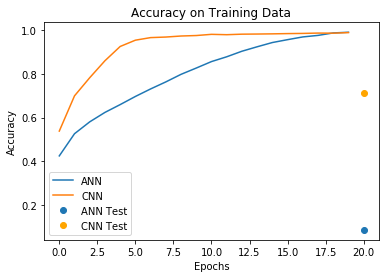

In [63]:
plt.title("Accuracy on Training Data")
plt.plot(ann_history.history['accuracy'])
plt.plot(cnn_history.history['accuracy'])
plt.plot(20, ann_acc, 'o', color='C0')
plt.plot(20, cnn_acc, 'o', color='orange')
plt.legend(["ANN", "CNN", "ANN Test", "CNN Test"])
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.savefig("cifar10-accuracies", dpi=200)

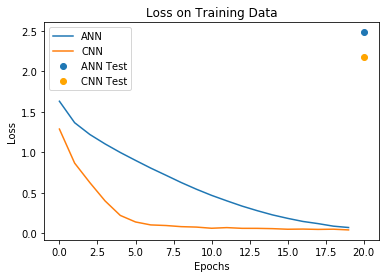

In [64]:
plt.title("Loss on Training Data")
plt.plot(ann_history.history['loss'])
plt.plot(cnn_history.history['loss'])
plt.plot(20, ann_loss, 'o', c="C0")
plt.plot(20, cnn_loss, 'o', color='orange')
plt.legend(["ANN", "CNN", "ANN Test", "CNN Test"])
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.savefig("cifar10-losses", dpi=200)